<a href="https://colab.research.google.com/github/19521309/CS331.M21-/blob/main/tf_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.random.normal(0,0.25,(2,500))
noise = np.random.normal(0,0.1,500)
x = x+noise

In [5]:
theta = np.linspace(0,2*np.pi,500)
y = np.array([np.cos(theta),np.sin(theta)]) + noise

(2, 1000)
(1, 200)


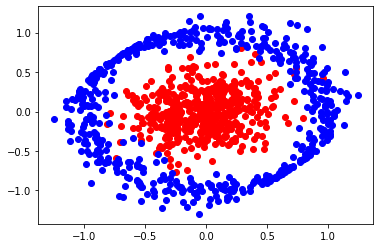

In [7]:
x_train = np.hstack((x,y))
print(x_train.shape)
y_train = np.hstack((np.ones((1,100)),np.zeros((1,100))))
print(y_train.shape)
plt.plot(x[0],x[1],"ro")
plt.plot(y[0],y[1],"bo")

In [11]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 478ms/step - loss: 0.6374 - mae: 0.6374
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6370 - mae: 0.6370
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6366 - mae: 0.6366
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6362 - mae: 0.6362
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6359 - mae: 0.6359
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6357 - mae: 0.6357
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6356 - mae: 0.6356
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6355 - mae: 0.6355
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6354 - mae: 0.6354
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6353 - mae: 0.6353
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 0.635

In [14]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.6949 - mae: 0.6949


[0.6948515772819519, 0.6948515772819519]

In [15]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
insurance_model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 0.8535 - mae: 0.8535


[0.8535204529762268, 0.8535204529762268]

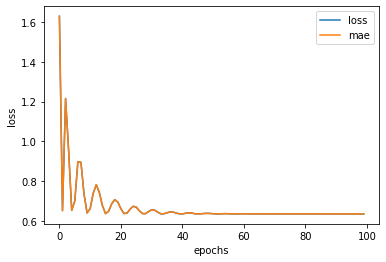

In [17]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [18]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [19]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

1/1 [==============================] - 0s 19ms/step - loss: 0.8539 - mae: 0.8539


(0.8539116978645325, 0.8539116978645325)

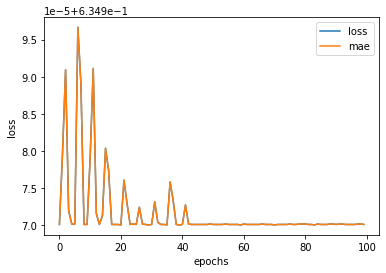

In [20]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable